<IPython.core.display.Javascript object>


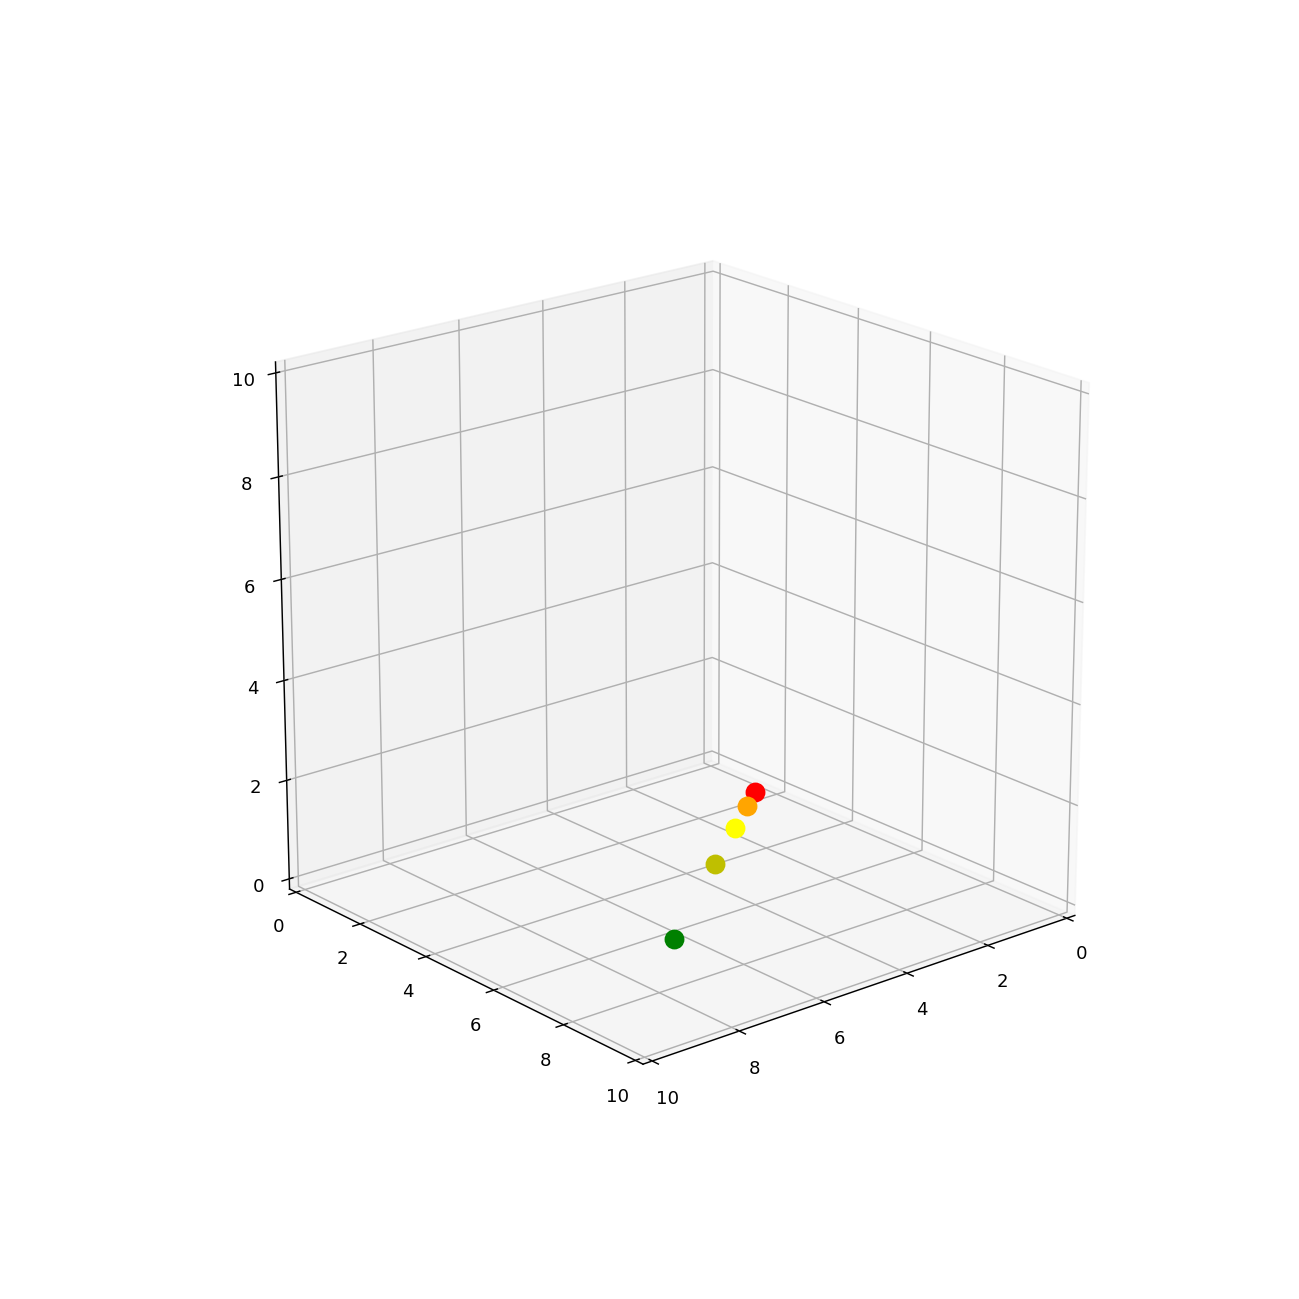

In [1]:
from pylab import *
from matplotlib.animation import *
from mpl_toolkits.mplot3d import Axes3D


%matplotlib notebook

V=array([0,4,4]) - array([10,10,1])
#print(V) #Vector
M=sqrt(V[0]**2+V[1]**2+V[2]**2) #Magnitude
#print(M) 
U=V/M #Unit vector
#print(U) 
UM=sqrt(U[0]**2+U[1]**2+U[2]**2) #Confirm that magnitude is equal to 1
#print(UM) 
S=70*U
#print(S) #Speed magnitude of 70
SM=sqrt(S[0]**2+S[1]**2+S[2]**2) #Confirm that magnitude is 70
#print(SM)

def quadratic(a , b , c) : 
    quadratic = (-b+sqrt(b**2-4*a*c))/(2*a)
    return quadratic
            

fig1 = figure(figsize=(10,10))
ax = fig1.gca(projection='3d')
rcParams.update({'font.size': 12})
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)

inc=110

time = linspace(0, 2*(quadratic(-4.9,S[2],-V[2])),inc) #time taken to hit first wall
x_t=zeros(inc)
y_t=zeros(inc)
z_t=zeros(inc)

vx,vy,vz= S[0], S[1], S[2]
bounce=False

for i in range(inc):
    if bounce==False:
        x_t[i] = vx*time[i]+10
        y_t[i] = vy*time[i]+10
        z_t[i] = ((-9.8/2)*(time[i]**2))+(vz*time[i])+1
        #ax.plot3D([x_t[i]], [y_t[i]], [z_t[i]],'o', color='red')
        if x_t[i] <= 0:
            bounce=True
            n=i
    elif bounce==True:
        x_t[i] = -vx*time[i-n]
        y_t[i] = vy*time[i-n]+4
        z_t[i] = ((-9.8/2)*(time[i-n]**2))+(vz*time[i-n])+4
        if y_t[i] <= 0:
            D=i+1
            break
        #ax.plot3D([x_t[i]], [y_t[i]], [z_t[i]],'o', color='blue')
        
x2=x_t[0:D]
y2=y_t[0:D]
z2=z_t[0:D]

ball, = ax.plot([],[],[],'or',markersize=10)
path, = ax.plot([],[],[],'o',markersize=10, Color='orange')
path2, = ax.plot([],[],[],'o',markersize=10, Color='yellow')
path3, = ax.plot([],[],[],'oy',markersize=10)
path4, = ax.plot([],[],[],'og',markersize=10)
path5, = ax.plot([],[],[],'ob',markersize=10)


def squash_init():     # initialize blank frames
    ball.set_data([],[])
    ball.set_3d_properties([])
    path.set_data([],[])
    path.set_3d_properties([])
    path2.set_data([],[])
    path2.set_3d_properties([])
    path3.set_data([],[])
    path3.set_3d_properties([])
    path4.set_data([],[])
    path4.set_3d_properties([])
    path5.set_data([],[])
    path5.set_3d_properties([])
    return ball, path, path2,path3,path4,path5

def squash_frame(i): # frame number i
    ax.view_init(20,50)
    x = x2[i]
    y = y2[i]
    z = z2[i]
    if i>=2:
        px = x2[i-2]
        py = y2[i-2]
        pz = z2[i-2]
    if i>=5:
        px2 = x2[i-5]
        py2 = y2[i-5]
        pz2 = z2[i-5]
    if i>=10:
        px3 = x2[i-10]
        py3 = y2[i-10]
        pz3 = z2[i-10]
    if i >=20:
        px4 = x2[i-20]
        py4 = y2[i-20]
        pz4 = z2[i-20]
    if i >=50:
        px5 = x2[i-50]
        py5 = y2[i-50]
        pz5 = z2[i-50]
    ball.set_data(x, y)
    ball.set_3d_properties(z)
    path.set_data(px,py)
    path.set_3d_properties(pz)
    path2.set_data(px2,py2)
    path2.set_3d_properties(pz2)
    path3.set_data(px3,py3)
    path3.set_3d_properties(pz3)
    path4.set_data(px4,py4)
    path4.set_3d_properties(pz4)
    path5.set_data(px5,py5)
    path5.set_3d_properties(pz5)
    fig1.canvas.draw()
    return ball, path, path2,path3,path4,path5

ani = FuncAnimation(fig1, squash_frame, init_func=squash_init, frames=len(x2),interval=25)
show()
